## 卷积层

Let's load two sample images, rescale their pixel values to 0-1, and center crop them to small 70×120 images:
加载两张图片，把像素缩放至0-1

In [45]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

1. 使用 TensorFlow 的 tf.keras.layers.CenterCrop 层，将图像进行居中裁剪。裁剪的目标高度为 70 像素，宽度为 120 像素。这个操作可以用于调整图像的大小，同时保留图像中心的重要信息。
2. 使用 TensorFlow 的 tf.keras.layers.Rescaling 层，将图像的像素值重新缩放到指定的比例。在这里，scale=1/255 表示将图像的像素值缩放到 0 到 1 之间，这是一种常见的预处理步骤，有助于提高神经网络的训练效果。

In [46]:
images.shape

TensorShape([2, 70, 120, 3])

`TensorShape([2, 70, 120, 3])` 表示一个四维张量，每个维度的大小分别为 2、70、120 和 3。让我们逐个维度解释：

1. **第一个维度 (2)：** 这通常表示张量中样本的数量。在这个例子中，有两个样本。

2. **第二个维度 (70)：** 这表示图像的高度。在这个例子中，图像的高度为 70 像素。

3. **第三个维度 (120)：** 这表示图像的宽度。在这个例子中，图像的宽度为 120 像素。

4. **第四个维度 (3)：** 这表示图像的通道数。通常，这个维度对应于图像的颜色通道，例如 RGB 彩色图像有 3 个通道。在这里，每个图像有 3 个通道。

因此，整个张量表示的是一个包含两个样本的图像集合，每个图像的高度为 70 像素，宽度为 120 像素，且每个像素有 3 个颜色通道（RGB）。这种表示形式在深度学习中非常常见，特别是在处理图像数据时。

在TensorFlow中，每个输入图像通常表示为形状为`[height, width,channels]`的3D张量。小批量表示为形状为`[mini batch size, height,width,channels]`的4D张量。卷积层的权重表示为形状为`[fh,fw,fn',fn]`的4D张量。卷积层的偏置项简单表示为形状`[fn]`的一维张量。

In [47]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

这里创建了一个卷积层对象 conv_layer。这个卷积层有以下参数：

* filters=32：指定了卷积核（filter）的数量，也就是在卷积过程中会学习到的特征的数量。这里有 32 个卷积核。
* kernel_size=7：指定了卷积核的大小，这里是一个 7x7 的卷积核。

第二行将创建的卷积层应用到输入图像 images 上，产生了卷积后的特征图（feature maps）。fmaps 是卷积后的输出结果。

在卷积神经网络中，卷积层的作用是通过卷积操作从输入数据中提取特征。每个卷积核都会在输入数据上滑动，执行卷积运算，从而生成特征图。这有助于网络学习到图像中的局部特征，例如边缘、纹理等。参数 filters 控制了输出特征图的数量，而 kernel_size 则定义了每个卷积核的大小。

In [48]:
fmaps.shape

TensorShape([2, 64, 114, 32])

1. 第一个维度 (2)： 这通常表示样本的数量，即批处理中的图像数。在这个例子中，有两个图像。

2. 第二个维度 (64)： 这是特征图的高度。特征图的高度为 64。

3. 第三个维度 (114)： 这是特征图的宽度。特征图的宽度为 114。

4. 第四个维度 (32)： 这是特征图的通道数。在卷积操作中，通道数对应于卷积核的数量，这里有 32 个卷积核，因此有 32 个通道。

因此，fmaps 是一个包含两个样本的特征图集合，每个特征图的大小为 64x114，且每个特征图有 32 个通道。这种形状的输出是卷积神经网络中常见的结果，其中每个通道捕捉图像中的不同特征。

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

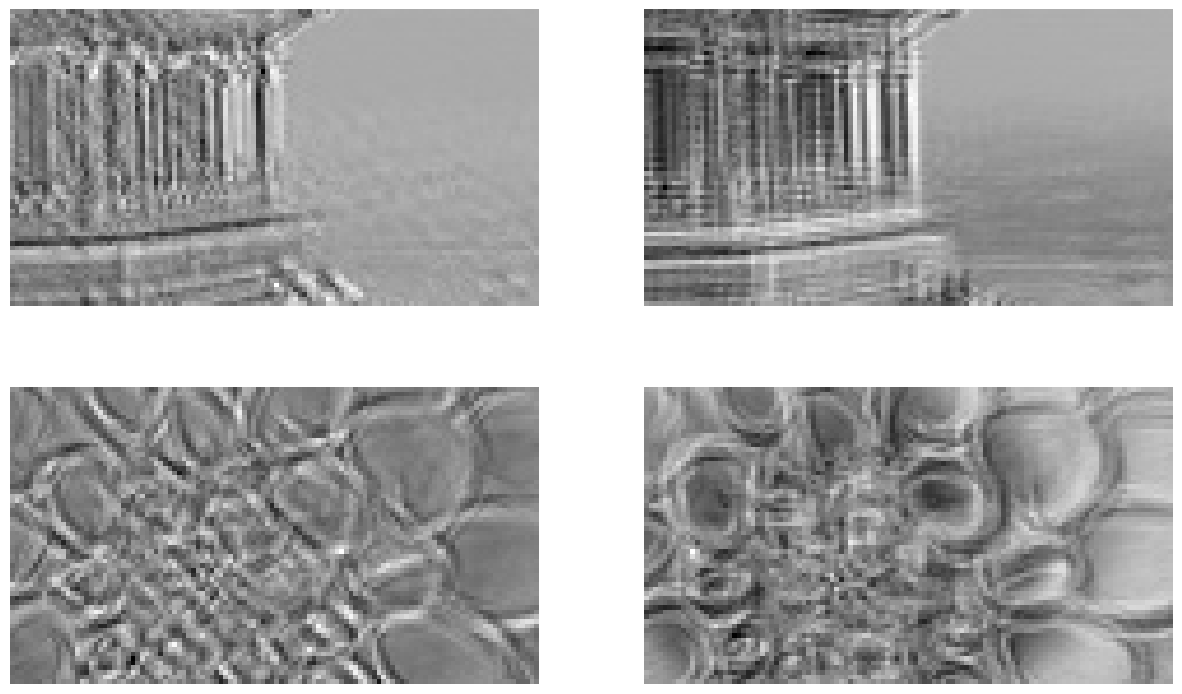

In [50]:
# extra code – displays the two output feature maps for each image
plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")
plt.show()

As you can see, randomly generated filters typically act like edge detectors, which is great since that's a useful tool in image processing, and that's the type of filters that a convolutional layer typically starts with. Then, during training, it gradually learns improved filters to recognize useful patterns for the task.

正如你所看到的，随机生成的滤波器通常的作用类似于边缘检测器，这很好，因为在图像处理中这是一个有用的工具，而卷积层通常就是以这种类型的滤波器开始的。然后，在训练过程中，它逐渐学习改进的滤波器以识别任务中的有用模式。

Now let's use zero-padding:

让我们使用零填充和步幅为1

In [9]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                    padding="same")
fmaps = conv_layer(images)

padding="same" 的设置确保了输出特征图的空间尺寸与输入特征图相同，即采用了零填充，使得卷积操作不改变输入图像的尺寸。

In [10]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [11]:
# extra code – shows that the output shape when we set strides=2
# 步长设置为 2，则 output 变小了一倍
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same",
                                    strides=2)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [12]:
# extra code – this utility function can be useful to compute the size of the
#              feature maps output by a convolutional layer. It also returns
#              the number of ignored rows or columns if padding="valid", or the
#              number of zero-padded rows or columns if padding="same"."""

import numpy as np

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

conv_output_size(np.array([70, 120]), kernel_size=7, strides=2, padding="same")

(array([35, 60]), array([5, 5]))

In [13]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [14]:
biases.shape

(32,)

使用 get_weights() 方法从卷积层 conv_layer 中获取权重参数。在卷积层中，权重通常包括卷积核（kernels）和偏置（biases）。

kernels.shape 查看卷积核的形状。在这里，kernels 是一个包含卷积核权重的数组，而 kernels.shape 输出的结果是 (7, 7, 3, 32)。
1. 第一个维度 (7)：卷积核的高度。
2. 第二个维度 (7)：卷积核的宽度。
3. 第三个维度 (3)：输入通道的数量。这里表示输入图像有 3 个通道，可能是 RGB 彩色图像。
4. 第四个维度 (32)：卷积核的数量。这里有 32 个卷积核。

biases.shape 为`(32,)` 的形状表示偏置（biases）数组是一维的，其中有 32 个元素。在卷积层中，每个卷积核都有一个对应的偏置项。这个一维数组的长度与卷积核的数量相等，每个元素对应于一个卷积核的偏置值。

具体来说，`(32,)` 的形状表示有 32 个偏置，每个偏置与对应的卷积核一起用于计算卷积层中的输出。在卷积操作中，每个卷积核对输入数据执行卷积运算，并将其结果与相应的偏置相加，形成卷积层的输出。这个偏置项有助于模型学习更复杂的特征。

In [15]:
# extra code – shows how to use the tf.nn.conv2d() operation

tf.random.set_seed(42)
filters = tf.random.normal([7, 7, 3, 2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

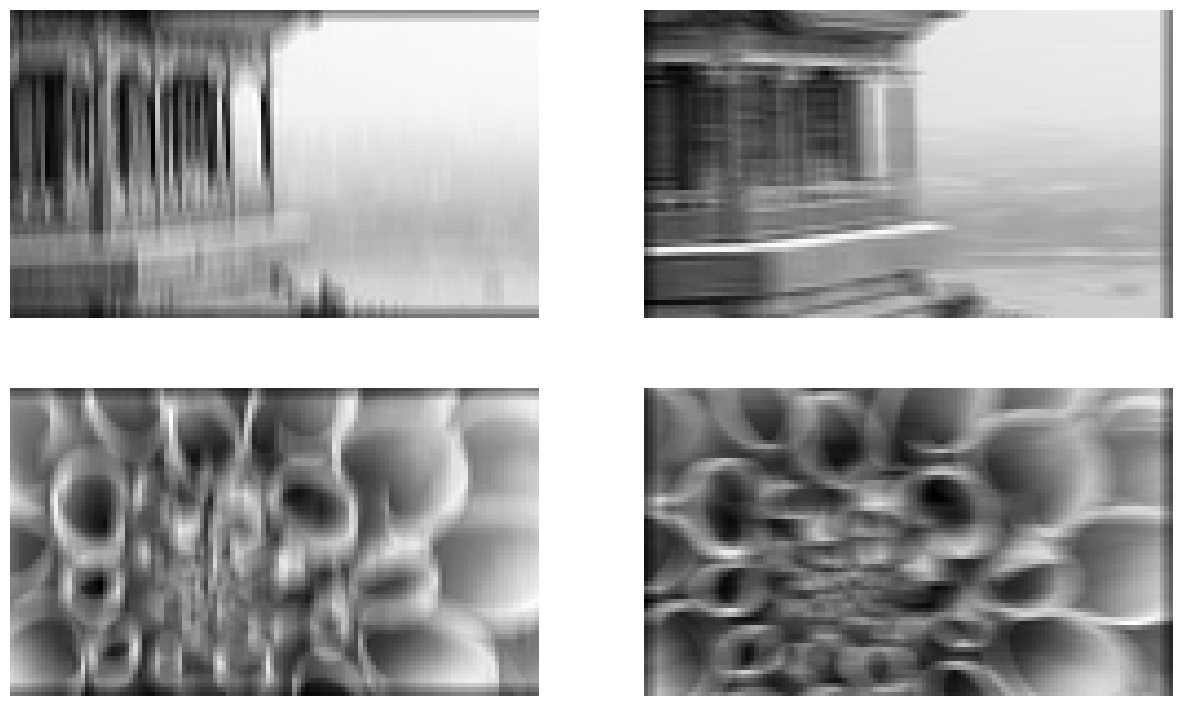

In [16]:
# extra code – shows how to manually create two filters to get images similar
#              to those in Figure 14–5.

plt.figure(figsize=(15, 9))
filters = np.zeros([7, 7, 3, 2])
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

Notice the dark lines at the top and bottom of the two images on the left, and on the left and right of the two images on the right? Can you guess what these are? Why were they not present in the previous figure?

You guessed it! These are artifacts due to the fact that we used zero padding in this case, while we did not use zero padding to create the feature maps in the previous figure. Because of zero padding, the two feature maps based on the vertical line filter (i.e., the two left images) could not fully activate near the top and bottom of the images. Similarly, the two feature maps based on the horizontal line filter (i.e., the two right images) could not fully activate near the left and right of the images.

请注意左侧两张图像的顶部和底部以及右侧两张图像的左侧和右侧出现的深色线条。你能猜到这些是什么吗？为什么在之前的图中它们不存在？

你猜对了！这些是由于在这种情况下我们使用了零填充，而在之前的图中我们没有使用零填充来创建特征图。由于零填充，基于垂直线滤波器的两个特征图（即左侧的两张图像）在图像的顶部和底部无法完全激活。同样，基于水平线滤波器的两个特征图（即右侧的两张图像）在图像的左侧和右侧也无法完全激活。

## 池化层

### 使用 keras 实现池化层

#### Max pooling 最大池化层

In [17]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

这一行代码创建了一个最大池化层对象 max_pool，其中 pool_size=2 指定了池化窗口的大小为 2x2。最大池化的目的是通过选择每个窗口中的最大值来减小输入数据的空间尺寸。  
最大池化是一种常用的池化操作，它有助于减少特征图的维度，同时保留主要的特征。在卷积神经网络中，最大池化通常用于降低计算成本、减小过拟合，并且可以提高网络对平移变换的不变性。

In [18]:
output = max_pool(images)

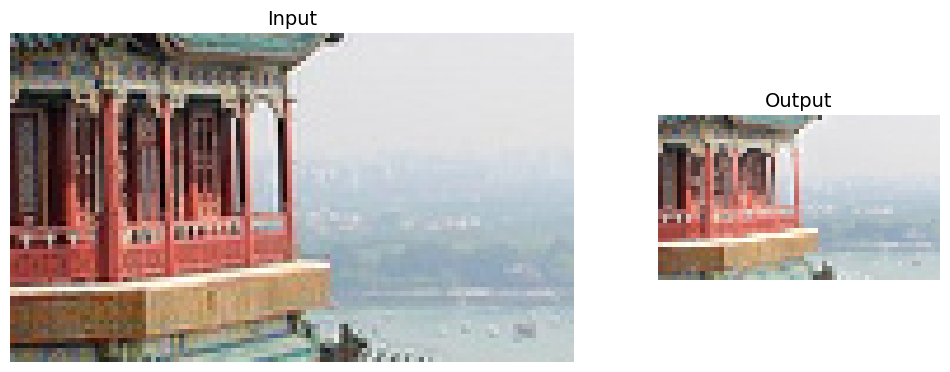

In [19]:
# extra code – this cells shows what max pooling with stride = 2 looks like

import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input")
ax1.imshow(images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output")
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

这里创建了一个图形对象 fig，设置了图形的大小为宽度 12 个单位，高度 8 个单位。然后，使用 GridSpec 创建了一个包含两个子图的网格，其中第一个子图的宽度是第二个子图的两倍。  
通过 add_subplot 方法，将第一个子图添加到图形中，设置标题为 "Input"。然后，使用 imshow 显示第一个输入图像，ax1.axis("off") 关闭坐标轴。  
类似地，通过 add_subplot 将第二个子图添加到图形中，设置标题为 "Output"。然后，使用 imshow 显示第一个输入图像经过最大池化操作后的输出图像，ax2.axis("off") 关闭坐标

#### Depth-wise pooling

In [20]:
# 如何使用 max_pool() op
np.random.seed(42)
fmaps = np.random.rand(2, 70, 120, 60)
with tf.device("/cpu:0"):
    output = tf.nn.max_pool(fmaps, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID")

output.shape

TensorShape([2, 70, 120, 20])

首先使用 NumPy 生成一个形状为 (2, 70, 120, 60) 的四维数组 fmaps，表示包含两个样本的特征图集合，每个特征图的大小为 70x120，且有 60 个通道。  
然后使用 tf.nn.max_pool 对输入特征图进行最大池化。参数如下：
* fmaps：输入的特征图。
* ksize=(1, 1, 1, 3)：池化窗口的大小，这里是 (1, 1, 1, 3)，表示在每个样本的每个通道上使用大小为 (1, 1, 3) 的池化窗口。
* strides=(1, 1, 1, 3)：步幅的设置，这里是 (1, 1, 1, 3)，表示在每个样本的每个通道上的每个维度上的步幅为 (1, 1, 3)。
* padding="VALID"：不进行填充，即采用有效池化。

最终的 output.shape 结果是 `TensorShape([2, 70, 120, 20])`，表示最大池化操作后的输出有 2 个样本，每个样本的特征图大小为 70x120，且有 20 个通道。在最大池化过程中，池化窗口沿着通道的方向将原本的 60 个通道减少到了 20 个通道。

In [21]:
class DepthPool(tf.keras.layers.Layer):
    def __init__(self, pool_size=2, **kwargs):
        super().__init__(**kwargs)
        self.pool_size = pool_size
    
    def call(self, inputs):
        shape = tf.shape(inputs)  # shape[-1] is the number of channels
        groups = shape[-1] // self.pool_size  # number of channel groups
        new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
        return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

这段代码定义了一个自定义的 Keras 层 DepthPool，该层实现了深度池化操作。深度池化是一种池化操作，但不同于在空间维度上进行的传统池化，它是在通道（深度）维度上执行的。  
在初始化函数中，DepthPool 类接受一个参数 pool_size，用于指定深度池化的大小。通过调用父类的初始化函数 `super().__init__(**kwargs)`，将其他关键字参数传递给父类。然后，将 pool_size 存储在类的属性中。  

call 方法定义了层的正向传播操作。在这里，它执行了深度池化的计算。
* `shape = tf.shape(inputs)`：获取输入张量 inputs 的形状。
* `groups = shape[-1] // self.pool_size`：计算通道的组数，即深度池化后的通道数量。
* `new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)`：构建一个新的形状，其中将通道数减少到 groups 组，每组包含 self.pool_size 个通道。
* `tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)`：通过在最后一个轴上取最大值，实现深度池化。这一步将每个通道组内的值取最大，从而实现深度池化操作。  

总的来说，这个 DepthPool 层实现了一种在通道维度上进行的深度池化操作，通过将通道分组并在每个组内取最大值来减少通道的数量。

In [22]:
# 验证自定义层 DepthPool 是否正确实现了深度池化操作，并且输出是否和使用 tf.nn.max_pool 操作的结果一致
np.allclose(DepthPool(pool_size=3)(fmaps), output)

True

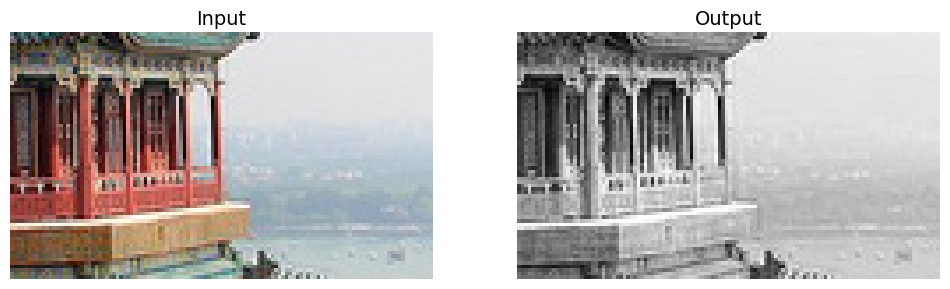

In [23]:
depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(images[0])  # plot the 1st image
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Output")
plt.imshow(depth_output[0, ..., 0], cmap="gray")  # plot 1st image's output
plt.axis("off")
plt.show()

这段代码的目的是通过图形方式展示深度池化层 DepthPool 对输入图像进行的操作，使你能够直观地比较输入和输出之间的差异。  
`depth_output[0, ..., 0]` 获取第一张图像的深度池化输出，并使用灰度色图进行绘制。

#### Global Average Pooling 平均池化层

In [24]:
global_avg_pool = tf.keras.layers.GlobalAvgPool2D()

这一行代码创建了一个 GlobalAvgPool2D 层的实例，该层是全局平均池化层。这个层在卷积神经网络中通常用于将整个特征图的空间维度降为1x1，同时保留每个通道的平均值。  
全局平均池化的操作是在每个通道上计算特征图上所有值的平均值，而不是像传统池化一样在每个区域上执行池化。这种操作可以帮助减少参数数量，并提取整个特征图的全局特征。

你可以将这个层添加到卷积神经网络的结构中，以在模型中引入全局平均池化操作。

In [25]:
global_avg_pool = tf.keras.layers.Lambda(
                    lambda X: tf.reduce_mean(X, axis=[1,2]))

这一行代码使用 Lambda 层创建了一个全局平均池化的自定义层。Lambda 层接受一个函数作为参数，这里使用了匿名函数 lambda X: tf.reduce_mean(X, axis=[1,2])，其中 X 是输入。这个 Lambda 层的作用是对输入张量 X 在第 1 和第 2 个轴上进行均值池化。

`tf.reduce_mean(X, axis=[1,2])`：对输入张量 X 在第 1 和第 2 个轴上计算均值，即执行全局平均池化。这会将输入的空间维度降为 1x1，并保留每个通道的平均值。
这个 Lambda 层可以像其他 Keras 层一样添加到神经网络中，以引入全局平均池化操作。例如，可以将其添加到卷积神经网络的结构中，以在模型中使用全局平均池化。

In [26]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.2601113 , 0.10849128]], dtype=float32)>

解释这个结果：
* 结果张量的形状 (2, 3) 表明有两个样本（图片）以及每个样本有3个通道。
* 结果中的每个元素表示相应样本和通道的平均值。例如，第一个元素 0.64338624 是第一个样本（图片）在第一个通道上的平均值，第二个元素 0.5971759 是第一个样本在第二个通道上的平均值，以此类推。
这个结果表明执行了全局平均池化操作，对每个样本的每个通道取了平均值，从而将输入张量的空间维度降为 (1, 1)。

总体而言，这个结果表明通过全局平均池化，对于每个样本，每个通道的特征都被平均汇总成一个值，得到了形状为 (2, 3) 的结果张量。

## CNN 架构

使用 CNN 处理 Fashion MNIST

In [28]:
# load the mnist dataset, add the channels axis to the inputs, scales the values to the 0-1 range, and splits the datasets
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

这段代码加载了 Fashion MNIST 数据集，并进行了数据预处理，包括添加通道维度、归一化像素值以及划分训练集、验证集和测试集。  
* Fashion MNIST 数据集包含了一系列的灰度图像，每个图像属于十个不同的服饰类别。
* `np.expand_dims(X_train_full, axis=-1)`：在训练集的最后一个维度上添加一个通道维度，将其从 (28, 28) 变为 (28, 28, 1)。这是因为神经网络期望输入有通道维度。
* `.astype(np.float32) / 255`：将像素值的数据类型转换为 float32，并将像素值归一化到 `[0, 1]` 范围内。

In [36]:
# from functions import partial
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

这个模型的结构是典型的卷积神经网络结构，包含卷积层、最大池化层、全连接层和 Dropout 层，用于处理 Fashion MNIST 数据集中的服饰图像。
1. 第一层使用64个卷积核，大小为7×7，没有步幅，因为输入图像不是很大。设置了input_shape=`[28,28,1]`, 因为图像是28×28像素，具有单个颜色通道(即灰度)。 
2. 接下来, 我们有一个最大池化层, 池化大小为2, 因此它将每个空间维度除以2。
3. 然后我们重复相同的结构两次：两个卷积层, 紧接着是一个最大池化层。
4. 请注意随着 CNN 向输出层延伸, 滤波器的数量会增加(最初是64,然后是128,然后是256)：增加是有意义的, 因为低层特征的数量通常很少 (例如小圆圈、水平线)，但是有很多不同的方法可以将它们组合成更高层次的特征。  
   通常的做法是在每个池化层之后将滤波器的数量加倍：由于池化层将每个空间维度除以2，所以我们能负担得起对下一层特征图数量加倍而不必担心参数数量、内存使用量或计算量的暴增。
5. 接下来是全连接的网络，该网络由两个隐藏的密集层和一个密集输出层组成。请注意，我们必须将其输入展平，因为密集网络需要每个实例的一维特征阵列。我们还添加了两个dropout层，每层的dropout率均为50%，以减少过拟合的情况。

In [37]:
# compiles, fits, evaluates, and use the model to make predictions
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]  # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10


2023-11-20 15:49:31.085898: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 139s 79ms/step - loss: 0.6983 - accuracy: 0.7567 - val_loss: 0.3733 - val_accuracy: 0.8666
Epoch 2/10
1719/1719 [==============================] - 142s 82ms/step - loss: 0.4162 - accuracy: 0.8581 - val_loss: 0.3373 - val_accuracy: 0.8724
Epoch 3/10
1719/1719 [==============================] - 145s 84ms/step - loss: 0.3546 - accuracy: 0.8787 - val_loss: 0.3144 - val_accuracy: 0.8888
Epoch 4/10
1719/1719 [==============================] - 156s 91ms/step - loss: 0.3199 - accuracy: 0.8912 - val_loss: 0.2722 - val_accuracy: 0.8978
Epoch 5/10
1719/1719 [==============================] - 164s 95ms/step - loss: 0.2941 - accuracy: 0.9007 - val_loss: 0.2438 - val_accuracy: 0.9088
Epoch 6/10
1719/1719 [==============================] - 161s 94ms/step - loss: 0.2724 - accuracy: 0.9078 - val_loss: 0.2667 - val_accuracy: 0.9024
Epoch 7/10
1719/1719 [==============================] - 155s 90ms/step - loss: 0.2601 - accuracy: 0.9110 - val_loss: 0.2540 - val

2023-11-20 16:14:43.795848: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1/1 [==============================] - 0s 155ms/step


In [40]:
np.argmax(y_pred[0])

9

In [43]:
Y_new = y_test[:10]
Y_new[0]

9